## Mean squared distribution periodic space
 
 ### 1: less Agents, large space
 - 200 Agents per simulation
 - Griddimensions : 100x100 , 300x300, 1000x1000
 - each 50 times
 - 1500 ticks
 
### 2: may agents, small space

 - 1000 Agents per simulation
 - Griddimensions: 100x100 , 300x300, 500x500 
 - each 50 times
 - 1500 ticks
### 3:  
 - 1000 Agents
 - Griddimensions: 80x80 , 100x100, 200x200"

In [1]:
##  read in data
data<-read.csv("MSDS_ensemble_100_300_1k_a50runs.csv",header=T)
data2<-read.csv("MSDS_Periodic_ensemble_100_300_500_1kagents_a50runs.csv",header=T)
data3<-read.csv("MSDS_Periodic_ensemble_80_100_200_1kagents_a30_2500_step_runs.csv",header=T)
data4<-read.csv("Periodic_simulation_120_150_200_1kagents_a30_2000_step_runs.csv")

In [16]:
dataprep <- function(data,ngroups){
            data <-data[-1,]
            l=vector(mode="list",length= ngroups)
            for(i in 1:ngroups){
            l[[i]]<-data[,seq(i+1,length(data),ngroups)]
            }
        return(l)
}

In [3]:
# Color Creation:
    #  to control alpha values

    mblue=rgb(0,0,230,max=230,alpha=15,names="mblue")
    mgreen=rgb(0,230,0,max=230,alpha=15,names="mgreen")
    mred=rgb(230,0,0,max=230,alpha=15,names="mred")
    mpu=rgb(230,0,230,max=230,alpha=15,names="mpu")
        
        mycols<-c(mblue,mgreen,mred,mpu,"black","darkgreen","red","brown")

# Custom Plotting function:

plotMSD<-function(data, ngroups, main){
    steps<-1:nrow(data[[1]])
    samples<-1:ncol(data[[1]])
    plot(steps,data[[3]][,1], 
    log="xy", 'l' ,
    main=main,sub= paste(max(samples),"Simulations",max(steps),"Steps"),
    xlab = "lag time τ ",
    ylab = "MSD r²τ ",
    col="white")
    for(j in 1:ngroups){
        for(i in samples){
           lines(steps,data[[j]][,i], 'l', col=mycols[j])
            }
        lines(steps,rowMeans(data[[j]]), 'l', col=mycols[j+3] ,lwd=1.5)
        }     
}

In [17]:
# Data Preparation
prep  <- dataprep(data,3)
prep2 <- dataprep(data2,3)
prep3 <- dataprep(data3,3)
prep4 <- dataprep(data4,3)

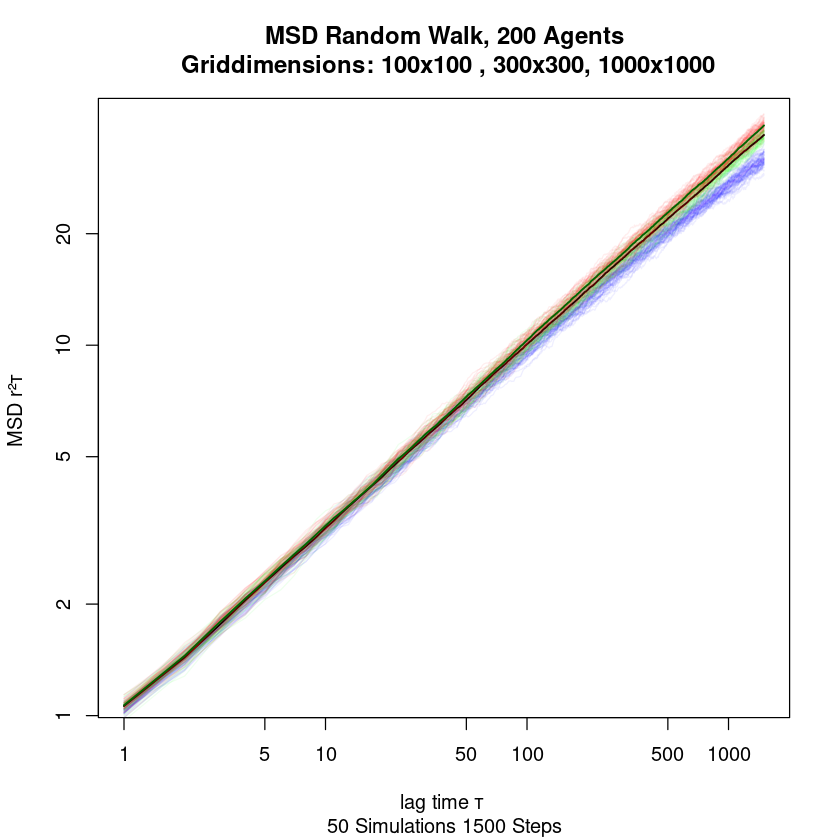

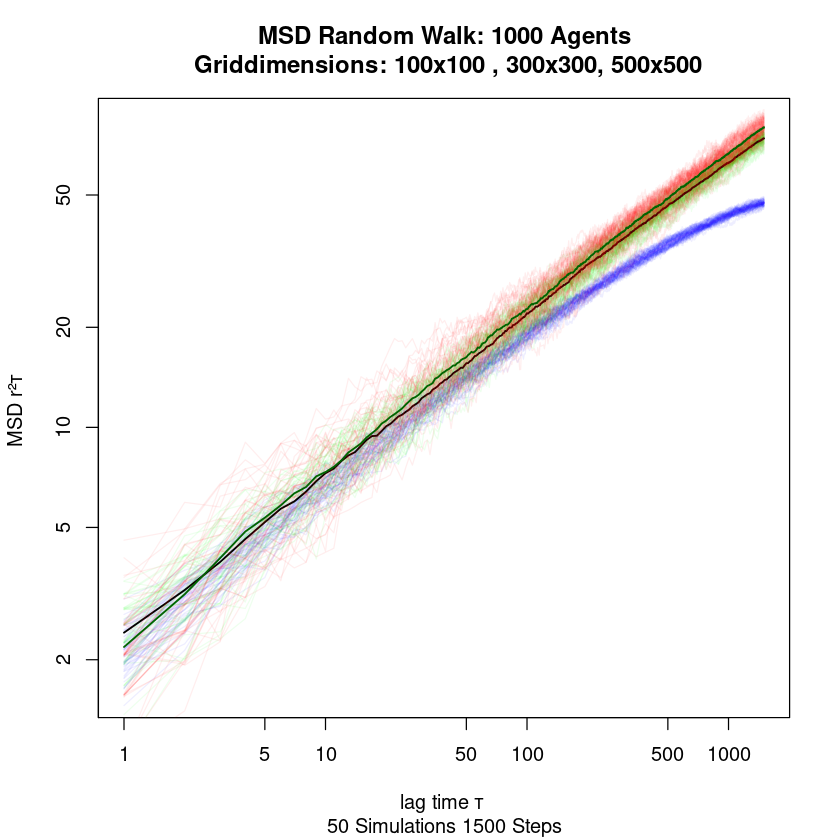

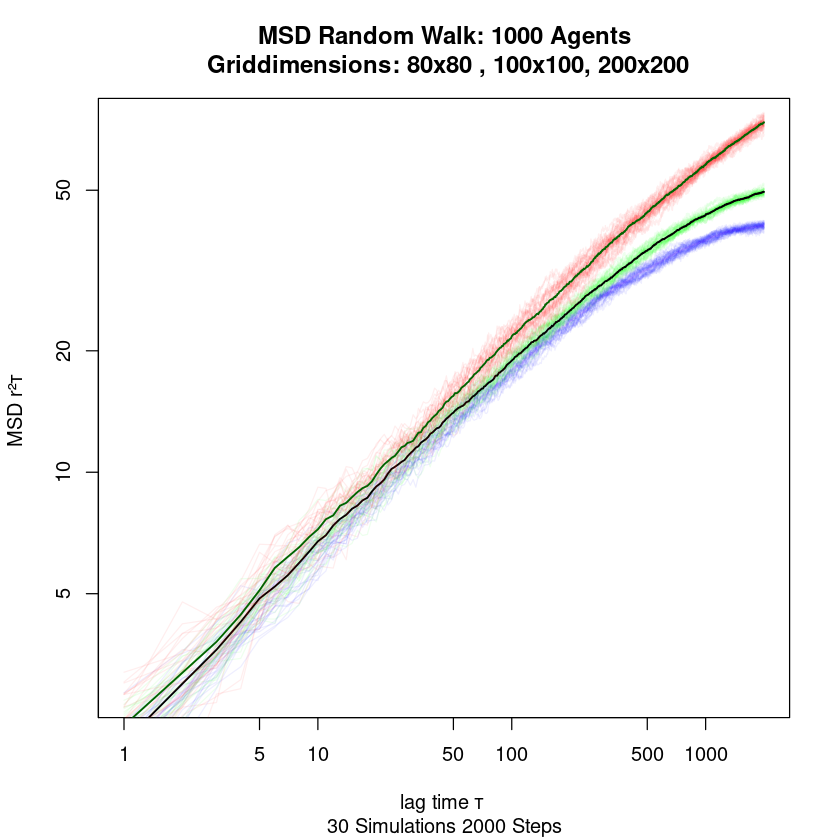

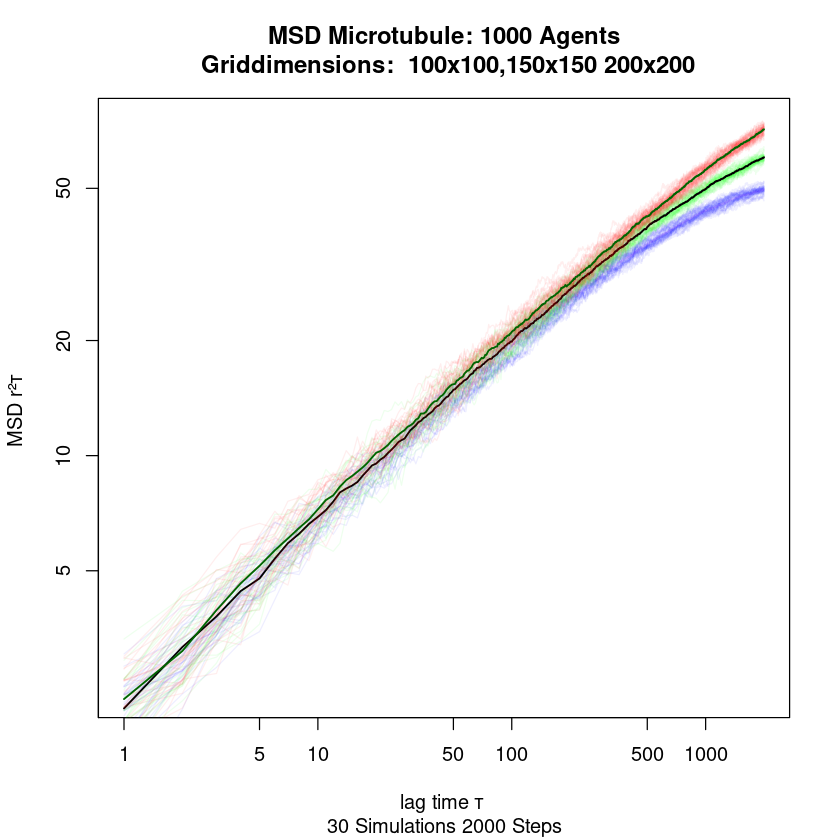

In [19]:
# Plotting
#par(mfrow=c(2,2))
plotMSD(prep,3,main="MSD Random Walk, 200 Agents\n Griddimensions: 100x100 , 300x300, 1000x1000")
plotMSD(prep2,3,main="MSD Random Walk: 1000 Agents\n Griddimensions: 100x100 , 300x300, 500x500")
plotMSD(prep3,3,main="MSD Random Walk: 1000 Agents\n Griddimensions: 80x80 , 100x100, 200x200")
plotMSD(prep4,3,main="MSD Microtubule: 1000 Agents\n Griddimensions:  100x100,150x150 200x200")

In [ ]:
par(mfrow=c(1,1))